Imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tutoriais TF/MNIST/train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


vectorization (organizing data into matrices and vectors)

In [4]:
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T # matrix 785 X 1000
print(data_dev.shape)
Y_dev = data_dev[0] # the labels with the corrects answers
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # Normalization

data_train = data[1000:m].T
print(data_train.shape)
Y_train = data_train[0] # the labels with the corrects answers
X_train = data_train[1:n]
X_train = X_train / 255. # Normalization
_ , m_train = X_train.shape

(785, 1000)
(785, 41000)


# neural network implementation

In [5]:
# initializing our parameters to random numbers
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

# hidden layer activation function
def ReLU(Z):
  return np.maximum(Z, 0)

# output layer activation function
def softmax(Z):
  A = np.exp(Z) / sum(np.exp(Z))
  return A






Foward Propagation

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g^{[1]}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g^{[2]}(Z^{[2]})$$


In [6]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)

  return Z1, A1, Z2, A2

In [7]:
# the explanation for this part of the code is in the file: One-hot encoding function explanation

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

Backward Propagation

$$
dZ^{[L]} = A^{[L]} - Y
$$
$$
dW^{[L]} = \frac{1}{m} dZ^{[L]} {A^{[L-1]}}^T
$$
$$
db^{[L]} = \frac{1}{m} \sum(dZ^{[L]}, \text{ axis = 1, keepdims = True})
$$
$$
dZ^{[L-1]} = {W^{[L]}}^T dZ^{[L]} \odot g'^{[L-1]}(Z^{[L-1]})
$$

(Note that \( \odot \) denotes element-wise multiplication)

$$
dZ^{[1]} = {W^{[2]}}^T dZ^{[2]} \odot g'^{[1]}(Z^{[1]})
$$
$$
dW^{[1]} = \frac{1}{m} dZ^{[1]} {A^{[0]}}^T
$$
$$
db^{[1]} = \frac{1}{m} \sum(dZ^{[1]}, \text{ axis = 1, keepdims = True})
$$

(Note that \(A^{[0]}^T\) is another way to denote the input features, which is \(X\))


In [8]:
def deriv_ReLU(Z):
  return Z > 0

In [9]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

  return dW1, db1, dW2, db2


Updating parameters

$$
W^{[1]} = W^{[1]} - \alpha \cdot dW^{[1]}
$$
$$
b^{[1]} = b^{[1]} - \alpha \cdot db^{[1]}
$$
$$
W^{[2]} = W^{[2]} - \alpha \cdot dW^{[2]}
$$
$$
b^{[2]} = b^{[2]} - \alpha \cdot db^{[2]}
$$


In [10]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1,b1,W2,b2

Accuracy and implementation of gradient descent

In [11]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 100 == 0:
      print("Iterantion: ", i)
      predictions = get_predictions(A2)
      print("Accuracy: ", get_accuracy(predictions, Y))

  return W1, b1, W2, b2

Training the model

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 501)

Iterantion:  0
[8 8 8 ... 0 0 8] [5 8 3 ... 3 4 2]
Accuracy:  0.1335609756097561
Iterantion:  100
[7 3 3 ... 7 6 0] [5 8 3 ... 3 4 2]
Accuracy:  0.6132439024390244
Iterantion:  200
[7 3 3 ... 3 4 2] [5 8 3 ... 3 4 2]
Accuracy:  0.7555121951219512
Iterantion:  300
[7 8 3 ... 3 4 2] [5 8 3 ... 3 4 2]
Accuracy:  0.8054878048780488
Iterantion:  400
[7 8 3 ... 3 4 2] [5 8 3 ... 3 4 2]
Accuracy:  0.8315609756097561
Iterantion:  500
[7 8 3 ... 3 4 2] [5 8 3 ... 3 4 2]
Accuracy:  0.8479024390243902


Tests

In [13]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("\nPrediction: ", prediction)
  print("\nLabel: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()


Prediction:  [8]

Label:  8


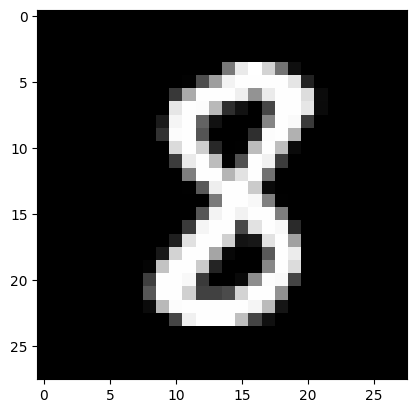


Prediction:  [1]

Label:  1


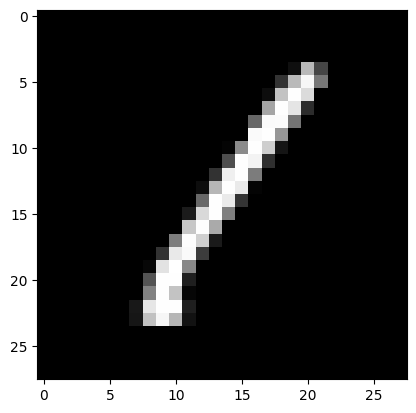


Prediction:  [8]

Label:  3


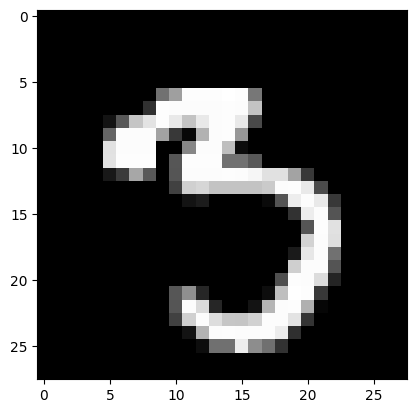


Prediction:  [2]

Label:  2


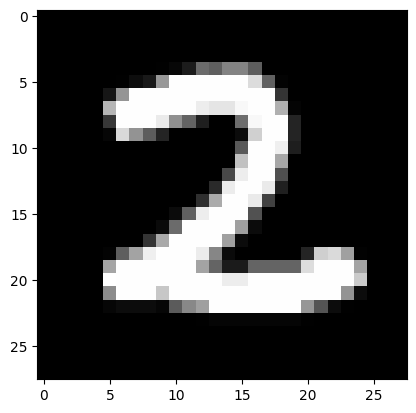

In [17]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(52, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 9 8 8 3 1 2 8 8 7 8 9 3 9 9 2 0 0 1 4 9 0 0 0 9 4 9 5 5 7 3 4 2 5 2 3
 9 9 6 1 0 0 4 3 4 2 0 0 0 8 0 9 8 5 7 9 8 3 7 4 5 6 8 7 7 5 6 7 3 2 0 2 8
 1 4 4 7 3 5 0 6 5 5 6 9 0 6 6 1 0 4 2 7 1 5 6 1 1 6 5 2 0 9 7 1 1 5 3 3 8
 3 4 5 6 7 2 4 3 4 4 0 7 3 2 0 8 1 0 6 3 4 1 8 7 0 6 4 4 2 0 1 0 7 7 9 3 2
 1 2 6 6 7 2 1 8 8 1 0 8 1 9 8 8 1 2 9 5 0 4 9 5 9 6 9 7 5 8 6 8 6 4 2 7 4
 2 8 9 4 5 3 4 7 3 1 9 9 1 9 7 2 3 1 9 4 9 2 8 2 4 3 6 4 0 3 9 0 9 0 2 0 9
 6 4 5 4 9 1 6 2 5 7 0 7 2 1 0 9 8 4 0 0 9 6 5 2 6 2 7 9 2 0 5 5 1 7 0 9 1
 4 2 0 6 6 9 8 2 9 1 6 8 1 7 1 2 4 7 4 0 2 0 2 7 3 3 0 5 7 7 0 2 1 1 7 4 8
 8 9 6 9 1 0 3 0 5 5 9 7 6 9 4 2 2 0 3 7 2 1 6 6 3 1 1 1 8 1 6 1 2 7 2 5 1
 9 9 3 8 7 1 9 7 1 4 5 9 7 3 5 7 4 8 9 3 6 1 0 6 1 4 4 3 8 6 9 2 7 4 9 9 8
 7 2 8 5 3 6 2 9 1 0 3 1 4 2 7 5 8 2 8 4 9 9 3 6 5 7 2 4 4 7 8 6 6 7 8 1 6
 5 8 9 3 3 2 6 9 3 6 3 7 9 9 7 8 5 9 2 4 3 5 0 0 3 9 4 9 3 4 5 3 1 6 6 8 2
 7 9 5 3 6 2 3 6 3 1 1 6 3 7 8 5 3 6 3 5 0 7 9 9 7 7 5 7 4 1 6 0 8 8 8 1 6
 6 6 9 0 9 6 2 8 3 1 2 7 

0.823